Import packages.

In [1]:
# %matplotlib notebook

%reload_ext autoreload
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize, PolynomialFeatures, scale

%aimport Sherlock
from Sherlock import Sherlock
from RBF import bases
from utils import adrs, read_design_space, approximate_pareto
import dcor

try: import GPy
except: pass

import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

import logging
logging.basicConfig(format='%(asctime)s %(levelname)s:%(message)s', level=logging.ERROR, datefmt='%I:%M:%S')

%autoreload 1

Read the design space.

In [2]:
X, y, _, names, _ = read_design_space('./final_result_impl_sobely.csv',
                                      use_hint=False, random_factor=0.0, hint_random_factor=0.0,
                                      return_names=True)

Plot the design space.

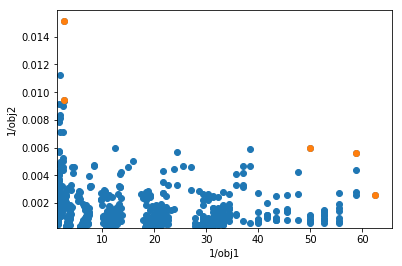

In [3]:
plt.figure()
y_pareto = approximate_pareto(y)[0]
plt.scatter(y[:,0], y[:,1])
plt.scatter(y_pareto[:,0], y_pareto[:,1])
plt.xlabel("1/" + names[-2])
plt.ylabel("1/" + names[-1])
plt.xlim(left=y[:,0].min()*0.95, right=y[:,0].max()*1.05)
plt.ylim(bottom=y[:,1].min()*0.95, top=y[:,1].max()*1.05)
plt.show()

Run Sherlock.

0.0


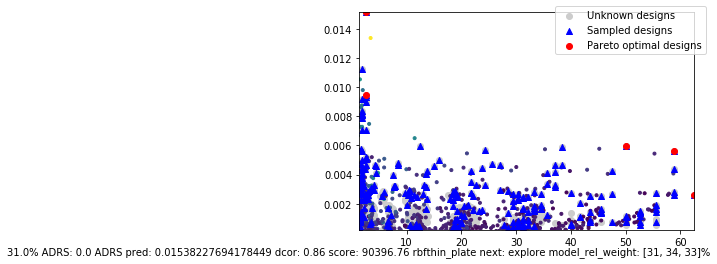

In [4]:
sherlock = Sherlock(
    n_init=5,
    budget=int(X.shape[0]*0.31),
    surrogate_type="rbfthin_plate-rbf_multiquadric-randomforest", #rbfthin_plate-rbf_multiquadric-randomforest-gpy
    kernel="matern",
    num_restarts=0,
    pareto_margin=0,
    y_hint=None,
    output_stats="", #"adrs,dcor,dcor_energy,entropy,pareto_score,next_action",
    plot_design_space=True,
    use_ted_in_loop=False,
    request_output=lambda y, idx: None,
    action_only=None,
    n_hint_init=0,
    scale_output=True,
    use_trace_as_prior=True,
    model_selection_type="mab10")

sherlock.fit(X).predict(X,y)
err = adrs(y, sherlock.known_idx, approximate=True)
print(err)

In [5]:
sherlock.known_idx

array([506, 502, 509, 259, 643, 485, 491, 533, 149, 144,   0,  47, 581,
       438, 336,   3,   1,   4,  48, 762,   6,  96, 192, 618,  10, 384,
         2, 240, 186, 193, 576, 190, 198,  41,   5, 150, 624, 288, 432,
        53,  45,  49,  42, 522, 145,  99,  12, 135, 480, 102,  54, 528,
       582, 672,  51,   9, 342,   7,  38,  97, 100, 390, 147, 122, 239,
       148, 708, 204, 197,  52, 101,  46,  60, 766, 577, 106, 196,  98,
        11, 146, 743, 246,  17, 172, 720,  59,  55, 203,  16, 724,  21,
        58, 155, 202,  15,   8, 194, 385,  50, 337, 294, 486, 627, 588,
       630, 534, 389, 579,  14, 756, 195, 289, 426, 573, 191, 603, 153,
       388,  94, 387, 396, 580, 156, 386, 340, 677, 189, 341, 107, 678,
       420, 245,  18, 623, 154, 161,  13, 104, 578, 378, 244, 767, 293,
       596, 108, 105,  57, 676, 621, 339,  65, 252, 208, 112, 747,  64,
       433, 209, 587,  22, 158, 151,  20, 584,  23, 299, 103,  70, 525,
       241, 179, 159, 625, 395, 532, 113, 629, 291,  29, 347, 72